In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Understanding

In [2]:
file_path = '/content/drive/MyDrive/ghs-2021-person-v1.csv'
file_path_12 = '/content/drive/MyDrive/ghs-2012-person-v2.1.csv'
file_path_13 = '/content/drive/MyDrive/ghs-2013-person-v1.csv'
file_path_14 = '/content/drive/MyDrive/ghs-2014-person-v1.csv'
file_path_15 = '/content/drive/MyDrive/ghs-2015-person-v1.csv'
file_path_16 = '/content/drive/MyDrive/ghs-2016-person-v1.csv'
file_path_17 = '/content/drive/MyDrive/ghs-2017-person-1.0.csv'
file_path_18 = '/content/drive/MyDrive/ghs-2018-person-v1.csv'
file_path_19 = '/content/drive/MyDrive/ghs-2019-person-v1.csv'
file_path_20 = '/content/drive/MyDrive/ghs-2020-person-v1.csv'
file_path_22 = '/content/drive/MyDrive/ghs-2022-person-v1.csv'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [4]:
# the file contains fileds that are not encoded in UTF-8. In this case, we will
# specify a different encoding, such as 'latin-1' or 'iso-8859-1', to
# handle the file correctly.
data_21 = pd.read_csv(file_path, encoding='latin-1')

In [5]:
data_22 = pd.read_csv(file_path_22, encoding='latin-1')
data_20 = pd.read_csv(file_path_20, encoding='latin-1')
data_19 = pd.read_csv(file_path_19, encoding='latin-1')
data_18 = pd.read_csv(file_path_18, encoding='latin-1')
data_17 = pd.read_csv(file_path_17, encoding='latin-1')
data_16 = pd.read_csv(file_path_16, encoding='latin-1')
data_15 = pd.read_csv(file_path_15, encoding='latin-1')
data_14 = pd.read_csv(file_path_14, encoding='latin-1')
data_13 = pd.read_csv(file_path_13, encoding='latin-1')
data_12 = pd.read_csv(file_path_12, encoding='latin-1')

<ipython-input-5-53b2d8382475>:3: DtypeWarning: Columns (137) have mixed types. Specify dtype option on import or set low_memory=False.
  data_19 = pd.read_csv(file_path_19, encoding='latin-1')


# Identifying common features from all datasets

In [6]:
# Identify common features
common_features = list(set(data_12.columns) & set(data_13.columns) & set(data_14.columns) & set(data_15.columns)& set(data_16.columns) & set(data_17.columns) & set(data_18.columns) & set(data_19.columns) & set(data_20.columns) & set(data_21.columns) & set(data_22.columns))


## Converting the headings into Lowercase to ensure accuracy in selecting common features

In [7]:
common_features

['undisab', 'person_wgt', 'disab']

In [8]:
data_12.columns = [col.lower() for col in data_12.columns]
data_13.columns = [col.lower() for col in data_13.columns]
data_14.columns = [col.lower() for col in data_14.columns]
data_15.columns = [col.lower() for col in data_15.columns]
data_16.columns = [col.lower() for col in data_16.columns]
data_17.columns = [col.lower() for col in data_17.columns]
data_18.columns = [col.lower() for col in data_18.columns]
data_19.columns = [col.lower() for col in data_19.columns]
data_20.columns = [col.lower() for col in data_20.columns]
data_21.columns = [col.lower() for col in data_21.columns]
data_22.columns = [col.lower() for col in data_22.columns]

In [9]:
# Identify common features
common_features1 = list(set(data_12.columns) & set(data_13.columns) & set(data_14.columns) & set(data_15.columns)& set(data_16.columns) & set(data_17.columns) & set(data_18.columns) & set(data_19.columns) & set(data_20.columns) & set(data_21.columns) & set(data_22.columns))


In [10]:
common_features1

['undisab',
 'age',
 'metro',
 'geotype',
 'psu',
 'sevdisab',
 'prov',
 'personnr',
 'stratum',
 'person_wgt',
 'uqnr',
 'disab']

We realized that some other features are named differently in different datasets but representing the same thing, e.g, in other data types, gender is named sex, and so on, we need to get those to use a common feature name.

### Renaming Common features that means the same thing to have the same feature names across all datasets

In [11]:
data_20.columns

Index(['uqnr', 'personnr', 'psu', 'prov', 'four_by_four', 'sex', 'age',
       'age_grp1', 'population', 'hhc_relationship', 'hhc_marital', 'spouse',
       'spouse_name', 'hhc_fath_alive', 'hhc_fath_parthh', 'hhc_fath_name',
       'hhc_moth_alive', 'hhc_moth_parthh', 'hhc_moth_name', 'education',
       'ecd_chldatt', 'ecd_notatt', 'ecd_notatt_rsn', 'ecd_fees', 'edu_attend',
       'edu_edui', 'edu_ppriv', 'edu_corr', 'edu_homesch', 'edu_homesch_part',
       'edu_homesch_smrtphone', 'edu_homesch_computer', 'edu_homesch_tablet',
       'edu_burs', 'edu_totfees', 'edu_nofees', 'edu_grde', 'edu_food',
       'edu_eatfood', 'hlt_medi', 'hlt_covid_postest', 'hlt_chronic_asm',
       'hlt_chronic_dbt', 'hlt_chronic_hbp', 'hlt_chronic_strk',
       'hlt_chronic_tb', 'dsb_see', 'dsb_hea', 'dsb_wal', 'dsb_rem', 'dsb_sel',
       'dsb_com', 'soc_grant', 'soc_grant_oag', 'soc_grant_dis',
       'soc_grant_csg', 'soc_grant_car', 'soc_grant_fos', 'soc_grant_wvt',
       'soc_grant_grn', 'soc_gra

In [12]:
data_13.columns

Index(['uqnr', 'personnr', 'psu', 'prov', 'b_nights', 'gender', 'age',
       'age_grp', 'race', 'q11relsh',
       ...
       'q411resp', 'undisab', 'disab', 'sevdisab', 'literacy3b', 'stratum',
       'geotype', 'metro', 'rotation', 'person_wgt'],
      dtype='object', length=169)

In [13]:
common_features2 = list(set(data_12.columns) & set(data_13.columns) & set(data_14.columns) & set(data_15.columns)& set(data_16.columns) & set(data_17.columns) & set(data_18.columns) & set(data_19.columns) & set(data_20.columns) & set(data_21.columns) & set(data_22.columns))


In [14]:
common_features2

['undisab',
 'age',
 'metro',
 'geotype',
 'psu',
 'sevdisab',
 'prov',
 'personnr',
 'stratum',
 'person_wgt',
 'uqnr',
 'disab']

In [15]:
data_20.shape

(34370, 81)

In [16]:
data_19.shape

(68986, 149)

In [17]:
# reading the first 10 rows to see how the data is tructured
data_21.head(10)

,uqnr,personnr,psu,prov,four_by_four,sex,age,age_grp1,population,hhc_relationship,...,sevdisab,stratum,geotype,lab_salary,employ_status1,employ_status2,metro,metro_code,rotation,person_wgt
0,160100090000003901,1,16010009000,Western Cape,Yes,Male,78,75+,White,Head/acting head,...,Not disabled,10301,3,Unspecified,Employed,Employed,Non-metro,WC - Non-metro,Quarter 3,2970.762309
1,160100090000003901,2,16010009000,Western Cape,Yes,Female,75,75+,White,Husband/wife/partner of household head,...,Disabled,10301,3,Not applicable,Unspecified,Not economically active,Non-metro,WC - Non-metro,Quarter 3,2971.535495
2,160100630000010801,1,16010063000,Western Cape,Yes,Female,28,25-29,Coloured,Head/acting head,...,Not disabled,10106,1,4017,Employed,Employed,Non-metro,WC - Non-metro,Quarter 3,5611.998377
3,160100630000010801,2,16010063000,Western Cape,Yes,Male,40,40-44,Coloured,Husband/wife/partner of household head,...,Not disabled,10106,1,2029,Employed,Employed,Non-metro,WC - Non-metro,Quarter 3,5585.705994
4,160100630000010801,3,16010063000,Western Cape,Yes,Female,17,15-19,Coloured,Son/daughter/stepchild/adopted child of househ...,...,Not disabled,10106,1,Not applicable,Unspecified,Not economically active,Non-metro,WC - Non-metro,Quarter 3,5595.212493
5,160100630000010801,4,16010063000,Western Cape,Yes,Female,9,05-09,Coloured,Son/daughter/stepchild/adopted child of househ...,...,Not disabled,10106,1,Not applicable,Not applicable,Not applicable,Non-metro,WC - Non-metro,Quarter 3,5608.131117
6,160100630000010801,5,16010063000,Western Cape,Yes,Male,1,00-04,Coloured,Son/daughter/stepchild/adopted child of househ...,...,Not disabled,10106,1,Not applicable,Not applicable,Not applicable,Non-metro,WC - Non-metro,Quarter 3,5564.675535
7,160100630000018001,1,16010063000,Western Cape,Yes,Female,54,50-54,Coloured,Head/acting head,...,Not disabled,10106,1,Not applicable,Unspecified,Not economically active,Non-metro,WC - Non-metro,Quarter 3,704.802081
8,160100630000018001,2,16010063000,Western Cape,Yes,Female,65,65-69,Coloured,Other relative (e.g. in-laws or aunt/uncle) of...,...,Not disabled,10106,1,Not applicable,Unspecified,Not economically active,Non-metro,WC - Non-metro,Quarter 3,664.914533
9,160100630000021601,1,16010063000,Western Cape,Yes,Male,68,65-69,White,Head/acting head,...,Not disabled,10106,1,Not applicable,Unspecified,Not economically active,Non-metro,WC - Non-metro,Quarter 3,1302.791196


In [18]:
# reading the last 5 to confirm if the data stucture ends as it started
data_21.tail()

,uqnr,personnr,psu,prov,four_by_four,sex,age,age_grp1,population,hhc_relationship,...,sevdisab,stratum,geotype,lab_salary,employ_status1,employ_status2,metro,metro_code,rotation,person_wgt
35260,987106920000042001,2,98710692000,Limpopo,Yes,Female,46,45-49,African/Black,Husband/wife/partner of household head,...,Not disabled,90401,2,Not applicable,Unemployed,Unemployed,Non-metro,LP - Non-metro,Quarter 1,1673.309771
35261,987106920000042001,3,98710692000,Limpopo,Yes,Male,26,25-29,African/Black,Son/daughter/stepchild/adopted child of househ...,...,Not disabled,90401,2,Not applicable,Unemployed,Unemployed,Non-metro,LP - Non-metro,Quarter 1,1682.215853
35262,987106920000042001,4,98710692000,Limpopo,Yes,Male,23,20-24,African/Black,Son/daughter/stepchild/adopted child of househ...,...,Not disabled,90401,2,Not applicable,Unspecified,Not economically active,Non-metro,LP - Non-metro,Quarter 1,1700.254385
35263,987106920000042001,5,98710692000,Limpopo,Yes,Female,13,10-14,African/Black,Son/daughter/stepchild/adopted child of househ...,...,Not disabled,90401,2,Not applicable,Not applicable,Not applicable,Non-metro,LP - Non-metro,Quarter 1,1687.239711
35264,987106920000042001,6,98710692000,Limpopo,Yes,Male,5,05-09,African/Black,Son/daughter/stepchild/adopted child of househ...,...,Not disabled,90401,2,Not applicable,Not applicable,Not applicable,Non-metro,LP - Non-metro,Quarter 1,1690.726965


In [19]:
# looking onto the columns available in the dataset
data_21.columns

Index(['uqnr', 'personnr', 'psu', 'prov', 'four_by_four', 'sex', 'age',
       'age_grp1', 'population', 'hhc_relationship', 'hhc_marital', 'spouse',
       'spouse_name', 'hhc_fath_alive', 'hhc_fath_parthh', 'hhc_fath_name',
       'hhc_moth_alive', 'hhc_moth_parthh', 'hhc_moth_name', 'education',
       'ecd_chldatt', 'ecd_notatt', 'ecd_notatt_rsn', 'ecd_fees', 'edu_attend',
       'edu_rsnn', 'edu_edui', 'edu_ppriv', 'edu_corr', 'edu_homesch',
       'edu_attfreq', 'edu_homesch_part', 'edu_homesch_smrtphone',
       'edu_homesch_computer', 'edu_homesch_tablet', 'edu_homesch_printed',
       'edu_burs', 'edu_totfees', 'edu_nofees', 'edu_grde', 'edu_same',
       'edu_food', 'edu_eatfood', 'hlt_medi', 'hlt_covid_postest',
       'hlt_chronic_asm', 'hlt_chronic_dbt', 'hlt_chronic_hbp',
       'hlt_chronic_strk', 'hlt_preg', 'hlt_chronic_tb', 'dsb_see', 'dsb_hea',
       'dsb_wal', 'dsb_rem', 'dsb_sel', 'dsb_com', 'soc_grant',
       'soc_grant_oag', 'soc_grant_dis', 'soc_grant_csg', 's

Lets check if employ_Status1 and employ_Status2 are corelated

In [20]:
unique_status1 = data_21['employ_status1'].unique()
unique_status2 = data_21['employ_status2'].unique()

unique_status1

array(['Employed', 'Unspecified', 'Not applicable', 'Unemployed'],
      dtype=object)

In [21]:
unique_status2

array(['Employed', 'Not economically active', 'Not applicable',
       'Unemployed'], dtype=object)

### Corerrelation finding

In [22]:
# Calculate correlation between employ_Status1 and employ_Status2
correlation = data_21['employ_status1'].astype('category').cat.codes.corr(data_21['employ_status2'].astype('category').cat.codes)
print("Correlation between employ_status1 and employ_status2:", correlation)


Correlation between employ_status1 and employ_status2: 0.8232810846458958


The correlation between employ_Status1 and employ_Status2 is 0.823, which is **strong**. This suggests that these two variables are closely related and convey similar information about employment status.

### Cross Tabulation findings

In [23]:
cross_tab = pd.crosstab(data_21['employ_status1'], data_21['employ_status2'])
print("\nCross-tabulation of employ_Status1 and employ_Status2:")
print(cross_tab)


Cross-tabulation of employ_Status1 and employ_Status2:
employ_status2  Employed  Not applicable  Not economically active  Unemployed
employ_status1                                                               
Employed            8022               0                        0           0
Not applicable         0           10374                        0           0
Unemployed             0               0                        0        5049
Unspecified            0               0                    11820           0


The cross-tabulation shows a clear alignment between the categories:
Employed in employ_Status1 corresponds directly to Employed in employ_Status2.
Not applicable in employ_Status1 corresponds directly to Not applicable in employ_Status2.
Unemployed in employ_Status1 corresponds directly to Unemployed in employ_Status2.
Unspecified in employ_Status1 corresponds directly to Not economically active in employ_Status2.

In [24]:
#checking the shape of the data
data_21.shape


(35265, 90)

In [25]:
# checking statistcal information of the numeric columns
data_21.describe()

,uqnr,personnr,psu,age,stratum,geotype,person_wgt
count,3.526500e+04,35265.000000,3.526500e+04,35265.000000,35265.000000,35265.000000,35265.000000
mean,6.146736e+17,3.108464,6.146736e+10,30.121282,55201.883737,1.492301,1715.085494
std,2.523552e+17,2.244827,2.523552e+10,20.921724,25960.285603,0.555612,1369.295442
min,1.601001e+17,1.000000,1.601001e+10,0.000000,10101.000000,1.000000,1.000000
25%,3.791012e+17,1.000000,3.791012e+10,12.000000,30103.000000,1.000000,902.581950
50%,5.991295e+17,3.000000,5.991295e+10,27.000000,55106.000000,1.000000,1366.191206
75%,7.991358e+17,4.000000,7.991358e+10,45.000000,78107.000000,2.000000,2092.898570
max,9.871069e+17,24.000000,9.871069e+10,116.000000,90401.000000,3.000000,16663.472312


In [26]:
# checking the number of null values in the whole dataset
null_values = data_21.isnull().values.sum()
null_values

8709

There are about 8709 null values in the dataset, to see the collumns that contains these null values we will filter the dataser to only display columns with null values

In [27]:
# Filter to show only columns with null values
columns_with_nulls = null_values[null_values > 0]
print(columns_with_nulls)

[8709]


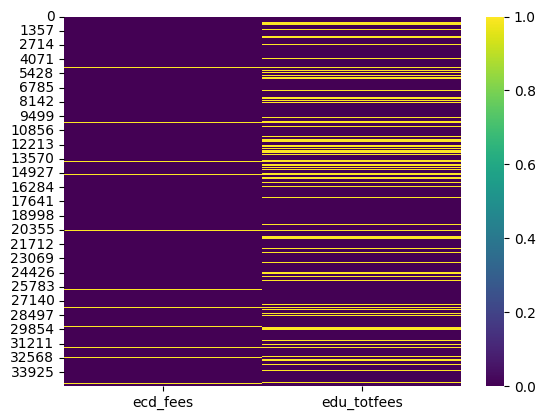

In [28]:
# using a heatmap to visualize the missing values in the two columns with null values
sns.heatmap(data_21[['ecd_fees', 'edu_totfees']].isnull(), cbar=True, cmap='viridis')
plt.show()

From the above results, we realize the columns that contain null values and the number of null values each columns have, edu_totfees: 7694, ecd_fees: 1015, the sum of the two should give us 8709, lets check before we conclude if these two columns are the only ones with rull values

In [29]:
1015 + 7694

8709

it is proven that the two columns are the only ones with null values, ecd_fees and edu_totfees


In [30]:
# reading the two columns with null values
data_21[['edu_totfees', 'ecd_fees']]

,edu_totfees,ecd_fees
0,Not applicable,Not applicable
1,Not applicable,Not applicable
2,Not applicable,Not applicable
3,Not applicable,Not applicable
4,NaN,Not applicable
...,...,...
35260,Not applicable,Not applicable
35261,Not applicable,Not applicable
35262,Not applicable,Not applicable
35263,NaN,Not applicable


### Visualizing the distribution of numerical features

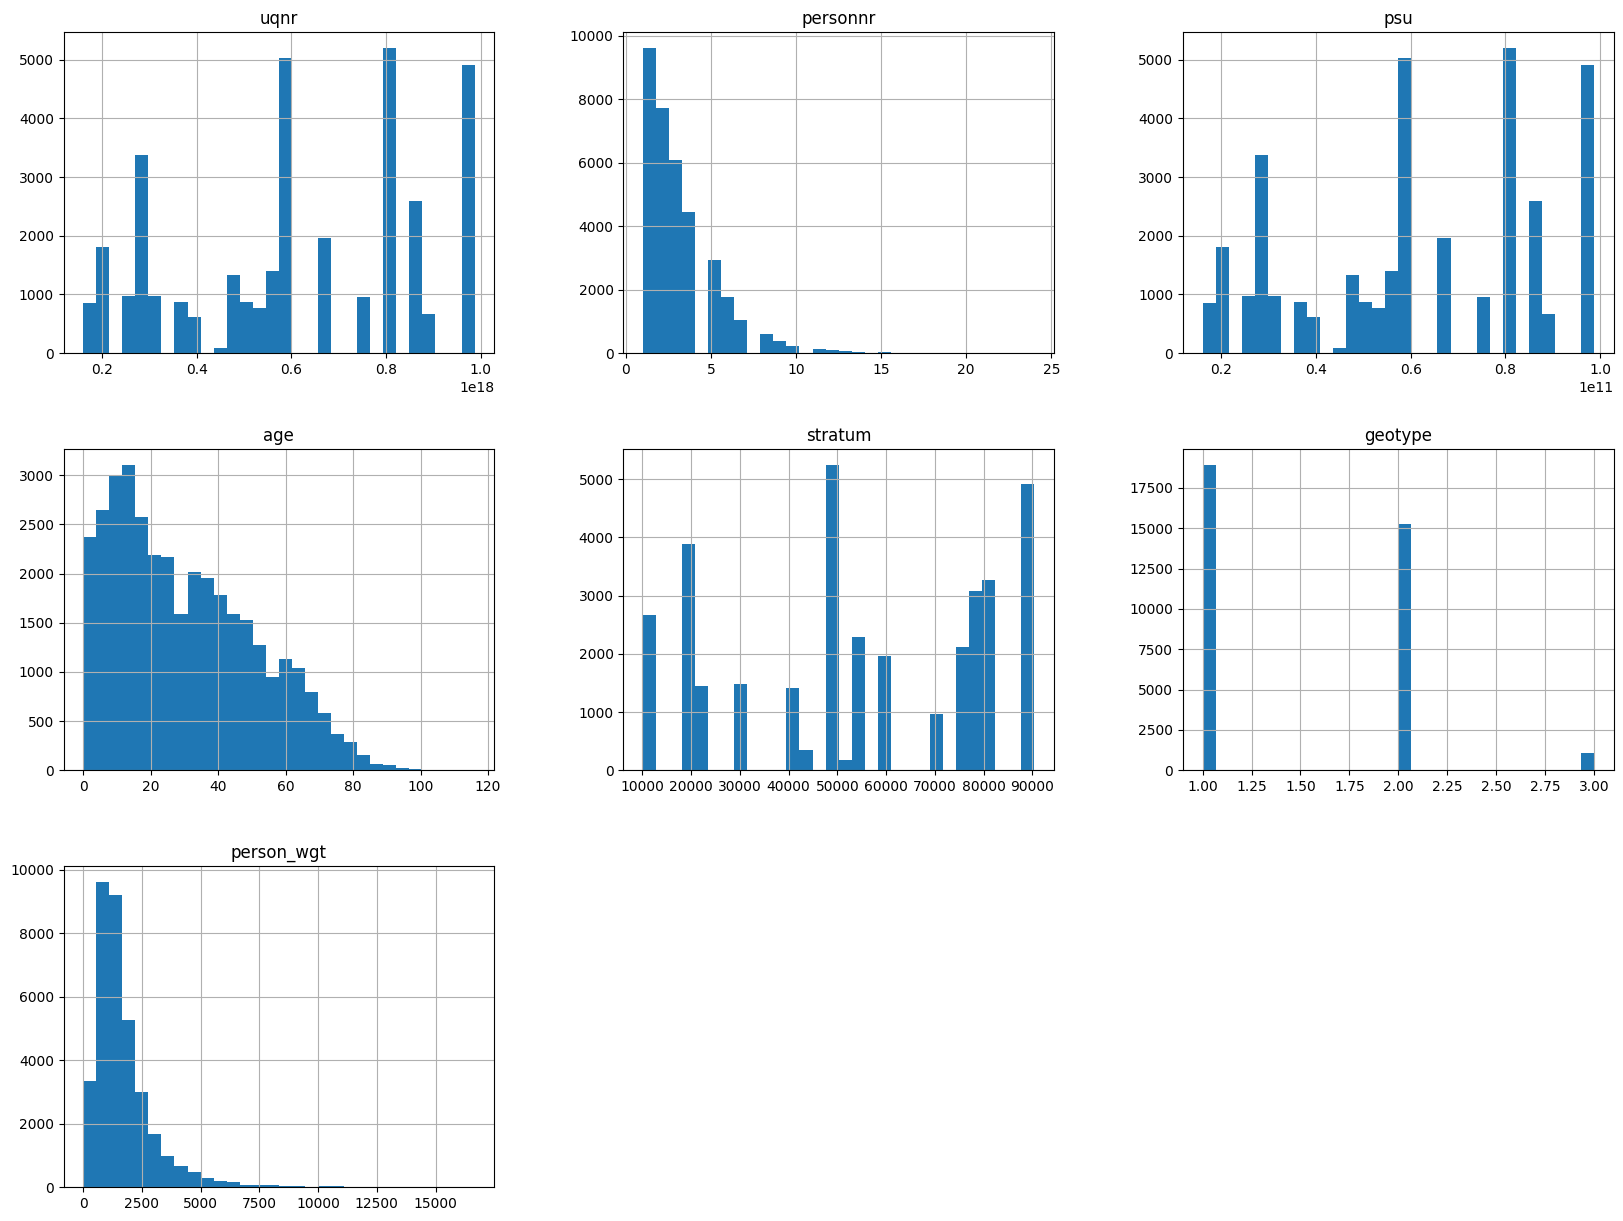

In [31]:
data_21.hist(bins=30, figsize=(20, 15))
plt.show()

### Undestanding the realationship between the numeriacal features

In [32]:
numerical_data = data_21.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
correlation_matrix


,uqnr,personnr,psu,age,stratum,geotype,person_wgt
uqnr,1.000000,0.015361,1.000000,-0.059899,0.996903,0.130816,0.011821
personnr,0.015361,1.000000,0.015361,-0.649028,0.012022,0.096058,0.051040
psu,1.000000,0.015361,1.000000,-0.059899,0.996903,0.130816,0.011821
age,-0.059899,-0.649028,-0.059899,1.000000,-0.057301,-0.054207,-0.063436
stratum,0.996903,0.012022,0.996903,-0.057301,1.000000,0.103831,0.028575
geotype,0.130816,0.096058,0.130816,-0.054207,0.103831,1.000000,-0.200920
person_wgt,0.011821,0.051040,0.011821,-0.063436,0.028575,-0.200920,1.000000


from the observation of the codecell above, it seems the columns both have 2 values, either Not 'applicable' or 'NaN'

# Checking for unique values in edu_totfees and ecd_fees

In [33]:
unique_values_edu_totfees = data_21['edu_totfees'].unique()

In [34]:
unique_values_edu_totfees

array(['Not applicable', nan, 'R12 001-R16 000', 'R301-R500',
       'R501-R1 000', 'Do not know', 'R3 001-R4 000', 'R2 001-R3 000',
       'R16 001-R20 000', 'R8 001-R12 000', 'R1 001-R2 000', 'R201-R300',
       'More than R20 000', 'R4 001-R8 000', 'R1-R100', 'R101-R200',
       'Unspecified'], dtype=object)

In [35]:
unique_values_ecd_fees = data_21['ecd_fees'].unique()

In [36]:
unique_values_ecd_fees

array(['Not applicable', 'R101-R200', nan, 'R201-R300', 'R301-R500',
       'R1-R100', 'R1 001-R2 000', 'R501-R1 000', 'More than R2 000',
       'Do not know'], dtype=object)

Ohh well, should we have not done the unique values check, we would have made a wrong conclusion, there are more unique values than just Not applicable and NaN .......

# Handling Null values

## in ecd_fees

before we handle the nulls, lets find out how many times each unique value appers so we know if we could remove it or replace with something else.

In [37]:
unique_values_count_ecd_fees = data_21['ecd_fees'].value_counts()
unique_values_count_ecd_fees

,count
ecd_fees,
Not applicable,33082
R101-R200,305
R201-R300,214
R301-R500,178
R1-R100,166
R501-R1 000,135
More than R2 000,72
R1 001-R2 000,71
Do not know,27


In [38]:
unique_value_count_edu_totfees = data_21['edu_totfees'].value_counts()
unique_value_count_edu_totfees

,count
edu_totfees,
Not applicable,24371
R101-R200,353
More than R20 000,335
R1-R100,275
R201-R300,254
R301-R500,247
R1 001-R2 000,245
R8 001-R12 000,234
R501-R1 000,233


Analysis of Value Counts:

ecd_fees:
The majority of entries are "Not applicable" (33,082).
Other categories have significantly fewer entries, with "R101-R200" being the most common fee range after "Not applicable".
The category "Do not know" appears 27 times, which might indicate uncertainty or missing information.

edu_totfees:
Similar to ecd_fees, "Not applicable" is the most frequent category (24,371).
There's a more diverse range of fee categories, but the counts are generally lower compared to "Not applicable".
"Unspecified" appears only once, which might be an anomaly or a placeholder for missing data.
"Do not know" appears 205 times, indicating uncertainty.

In [39]:
# Impute missing values in 'ecd_fees' with  'Do not know'
data_21['ecd_fees'].fillna('Do not know', inplace = True)

In [40]:
# Impute missing values in 'edu_totfees' with 'Do not know'
data_21['edu_totfees'].fillna('Do not know' , inplace= True)

In [41]:
# Merge 'Unspecified' with 'Do not know' in 'edu_totfees'
data_21['edu_totfees'].replace('Unspecified', 'Do not know' , inplace = True)

In [42]:
data_21.isnull().values.sum()

0

### Detailed Data Exoloration

In [43]:

data_21.dtypes

,0
uqnr,int64
personnr,int64
psu,int64
prov,object
four_by_four,object
...,...
employ_status2,object
metro,object
metro_code,object
rotation,object


In [44]:
# checking if the data has some duplicates
data_21.duplicated().sum()

0

In [45]:
data_21['lab_salary'].value_counts()

,count
lab_salary,
Not applicable,27347
22139,623
5300,434
4017,428
9482,398
...,...
4019,1
3778,1
8250,1


In [46]:
data_21['uqnr'].duplicated().sum()

25636